In [11]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

In [14]:
options = {
    'model': 'cfg/yolo.cfg',
    'load': 'bin/yolo.weights',
    'threshold': 0.3,
    'gpu': 1.0
}

tfnet = TFNet(options)

Parsing ./cfg/yolo.cfg
Parsing cfg/yolo.cfg
Loading bin/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.0459752082824707s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep! 

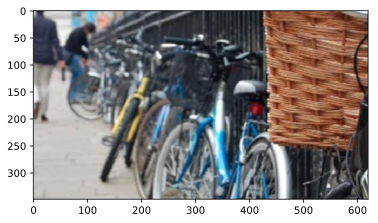

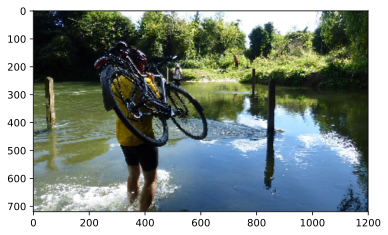

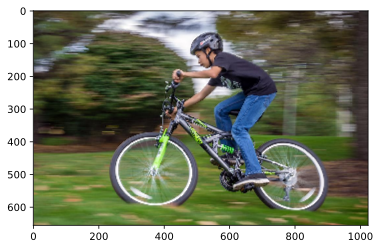

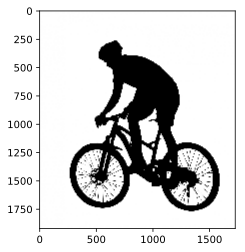

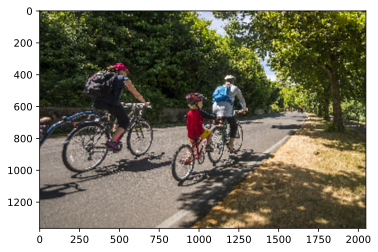

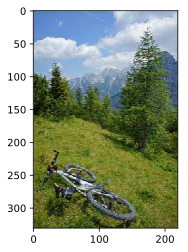

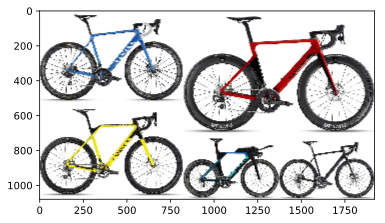

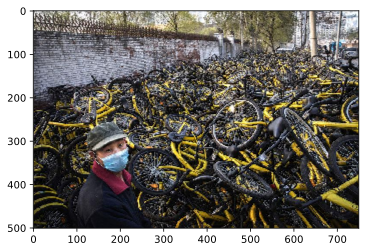

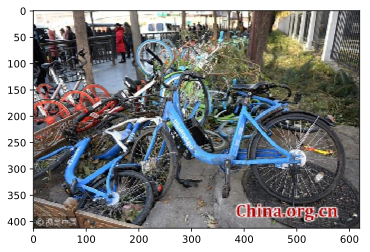

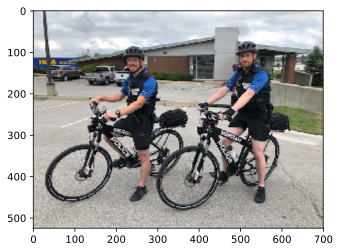

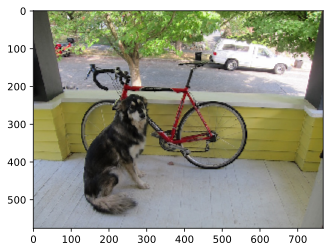

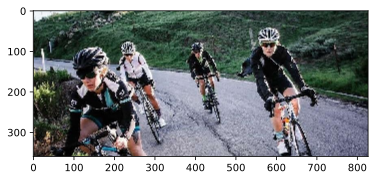

In [51]:
import glob
images = [cv2.imread(file) for file in glob.glob("sample/*.jpg")]
images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in images]
for img in images:
    plt.imshow(img)
    plt.show()

In [53]:
results = [tfnet.return_predict(img) for img in images]

img.shape

(360, 827, 3)

In [54]:
results

[[{'bottomright': {'x': 49, 'y': 217},
   'confidence': 0.770212,
   'label': 'person',
   'topleft': {'x': 1, 'y': 0}},
  {'bottomright': {'x': 115, 'y': 186},
   'confidence': 0.53794646,
   'label': 'person',
   'topleft': {'x': 57, 'y': 15}},
  {'bottomright': {'x': 155, 'y': 208},
   'confidence': 0.4234897,
   'label': 'bicycle',
   'topleft': {'x': 69, 'y': 102}},
  {'bottomright': {'x': 189, 'y': 215},
   'confidence': 0.46571863,
   'label': 'bicycle',
   'topleft': {'x': 106, 'y': 99}},
  {'bottomright': {'x': 306, 'y': 252},
   'confidence': 0.4367216,
   'label': 'bicycle',
   'topleft': {'x': 120, 'y': 63}},
  {'bottomright': {'x': 422, 'y': 328},
   'confidence': 0.49264973,
   'label': 'bicycle',
   'topleft': {'x': 197, 'y': 61}},
  {'bottomright': {'x': 221, 'y': 292},
   'confidence': 0.4855653,
   'label': 'bicycle',
   'topleft': {'x': 131, 'y': 131}},
  {'bottomright': {'x': 250, 'y': 312},
   'confidence': 0.41688257,
   'label': 'bicycle',
   'topleft': {'x': 174

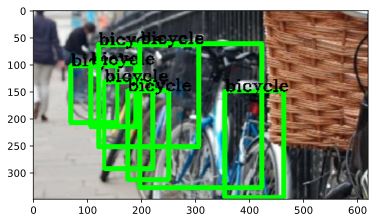

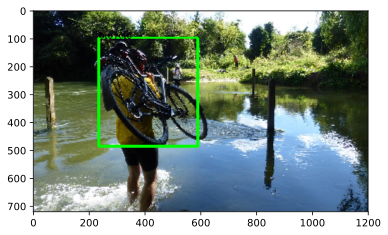

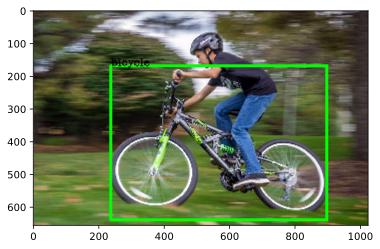

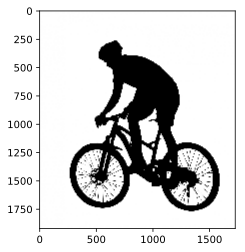

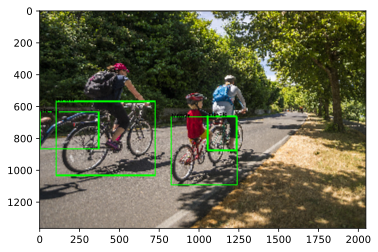

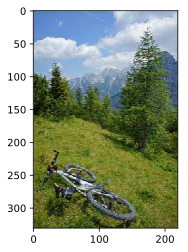

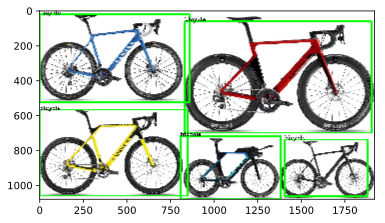

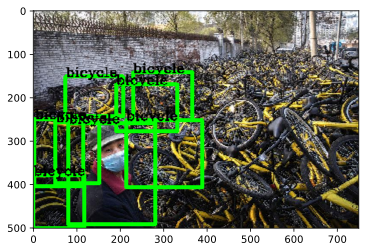

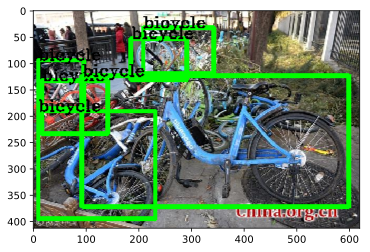

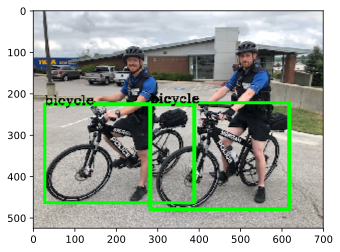

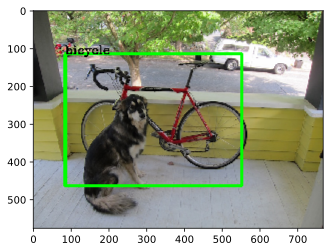

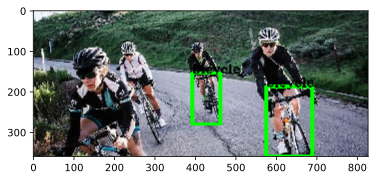

In [59]:
for index,result in enumerate(results):
    img = images[index]
    for ouputs in result:
        if(ouputs['label'] == 'bicycle'):
            tl = (ouputs['topleft']['x'], ouputs['topleft']['y'])
            br = (ouputs['bottomright']['x'], ouputs['bottomright']['y'])
            label = ouputs['label']

            img = cv2.rectangle(img, tl, br, (0, 255, 0), 7)
            img = cv2.putText(img, label, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2)
    plt.imshow(img)
    plt.show()